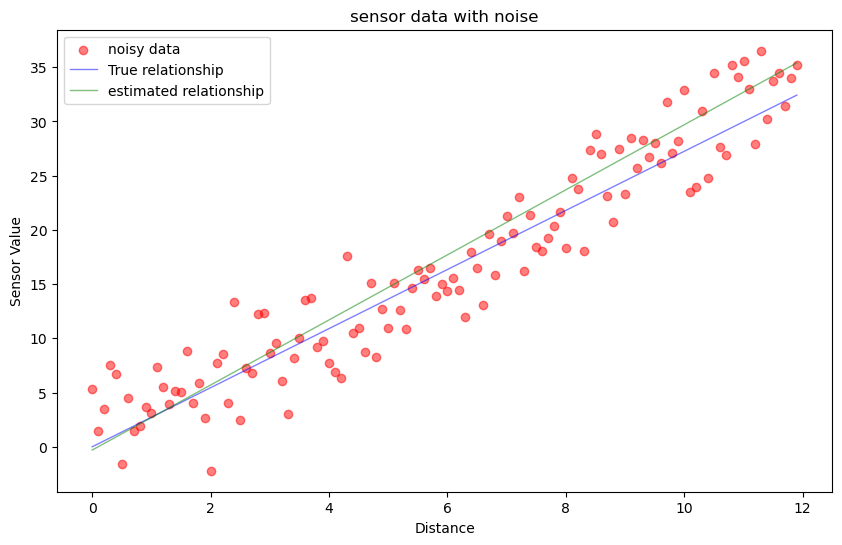

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.arange(0,12,0.1)

true_y = 2.725 * x
est_y = 3 * x

noise = np.random.normal(0,3, x.size)
noisy_y = true_y + noise

plt.figure(figsize=(10,6))
plt.scatter(x, noisy_y, label ='noisy data', alpha=0.5, color='r')
plt.plot(x, true_y, label='True relationship', color='b', linewidth=1, alpha=0.5)
plt.plot(x, est_y, label='estimated relationship', color='g', linewidth=1, alpha=0.5)
plt.title('sensor data with noise')
plt.xlabel('Distance')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()



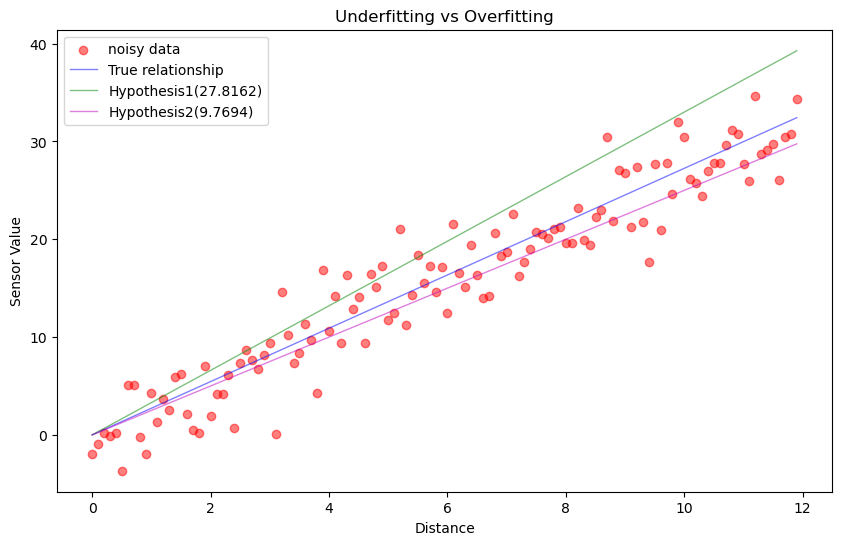

In [14]:
def mean_squared_error(y,fx):
    return np.mean((y-fx)**2)
Hypothesis1 = 3.3 * x
Hypothesis2 = 2.5 * x
true_y = 2.725 * x

noise = np.random.normal(0,3, x.size)
noisy_y = true_y + noise

mse1= mean_squared_error(noisy_y, Hypothesis1)
mse2= mean_squared_error(noisy_y, Hypothesis2)

plt.figure(figsize=(10,6))
plt.scatter(x, noisy_y, label ='noisy data', alpha=0.5, color='r')
plt.plot(x, true_y, label='True relationship', color='b', linewidth=1, alpha=0.5)
plt.plot(x, Hypothesis1, label=f'Hypothesis1({mse1:.4f})', color='g', linewidth=1, alpha=0.5)
plt.plot(x, Hypothesis2, label=f'Hypothesis2({mse2:.4f})', color='m', linewidth=1, alpha=0.5)
plt.title('Underfitting vs Overfitting')
plt.xlabel('Distance')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

(56,) 56


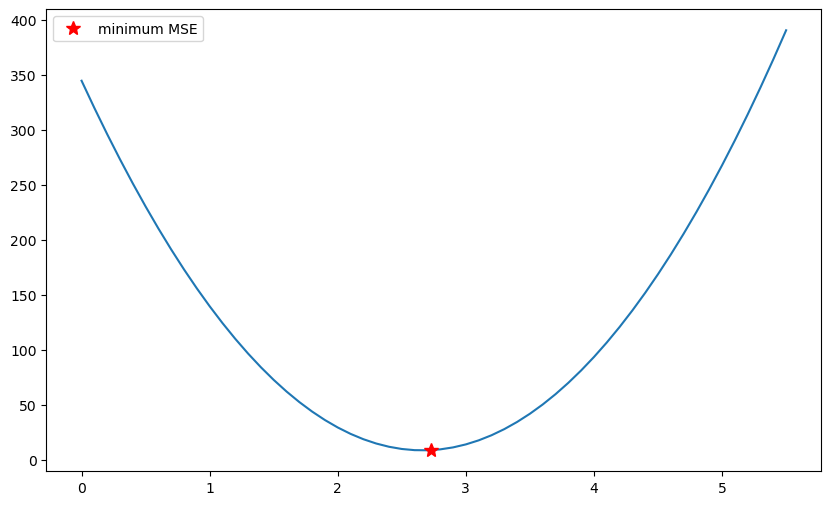

In [34]:
def fx(a):
    return a*x

a_values = np.arange(0,5.6,0.1)

mse_values = []
for a in a_values:
    mse = mean_squared_error(noisy_y,fx(a))
    mse_values.append(mse)

print(a_values.shape, len(mse_values))

plt.figure(figsize=(10,6))
plt.plot(a_values, mse_values)
plt.plot(2.725, min(mse_values), 'r*', markersize=10,label='minimum MSE')
plt.legend()
plt.show()


100 100


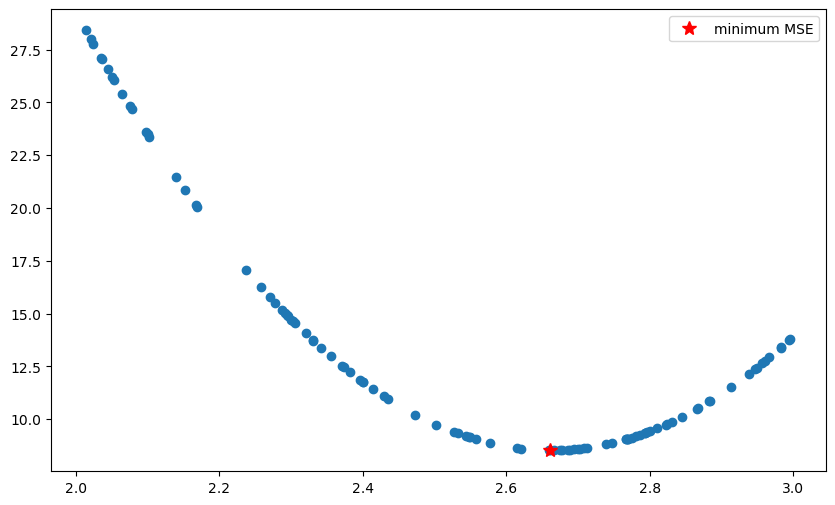

In [28]:
a_list = []
for i in range(100):
    a = np.random.uniform(2,3)
    a_list.append(a)

mse_list = []
for a in a_list:
    mse = mean_squared_error(noisy_y,fx(a))
    mse_list.append(mse)

print(len(a_list), len(mse_list))

plt.figure(figsize=(10,6))
plt.scatter(a_list, mse_list)
plt.plot(a_list[np.argmin(mse_list)], min(mse_list), 'r*', markersize=10,label='minimum MSE')
plt.legend()
plt.show()

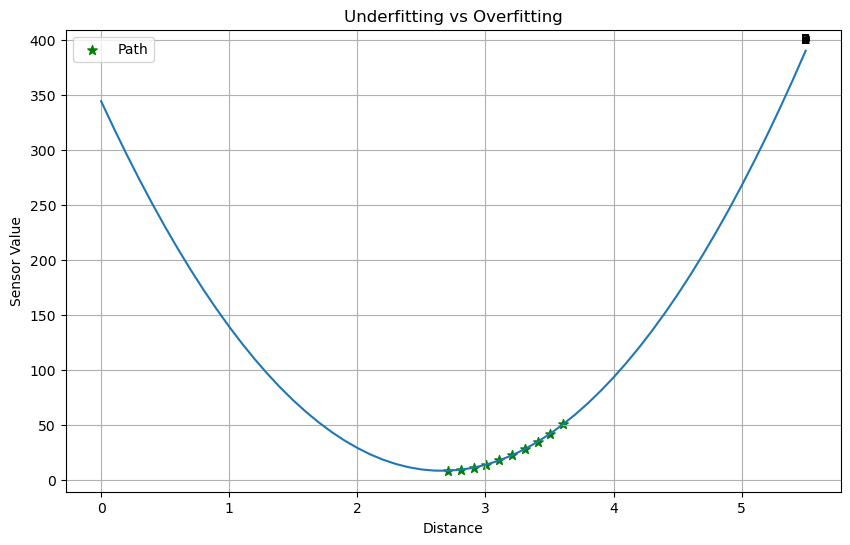

In [72]:
a_start = np.random.uniform(0, 5.6)
step_size= 0.1
paths =[a_start]
mses = [mean_squared_error(noisy_y, fx(a_start))]


for i in range(100):
    a_start_left = a_start - step_size
    a_start_right = a_start + step_size    

    if mean_squared_error(noisy_y, fx(a_start_left)) < mean_squared_error(noisy_y, fx(a_start)):
        a_start = a_start_left 
        paths.append(a_start)
        mses.append(mean_squared_error(noisy_y, fx(a_start_left)))
    elif mean_squared_error(noisy_y, fx(a_start_right)) < mean_squared_error(noisy_y, fx(a_start)):
        a_start = a_start_right
        paths.append(a_start)
        mses.append(mean_squared_error(noisy_y, fx(a_start_right)))
    else:
        pass


plt.figure(figsize=(10,6))
plt.plot(a_values, mse_values)
plt.scatter(paths, mses, color='green', marker='*', s=50, label="Path")
for i, a in enumerate(paths):
    plt.annotate(f"{i}", (a, mean_squared_error(noisy_y, fx(a))), textcoords='offset points', xytext=(0,5), ha='center')
plt.title('Underfitting vs Overfitting')
plt.xlabel('Distance')
plt.ylabel('Sensor Value')
plt.grid(True)
plt.legend()
plt.show()
